In [1]:
from MachineLearningModule import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp

In [2]:
pandas_dataframe = pd.read_csv("Combined_Two_Port_Check_Standard.csv")

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,11,12,16,18,19,20,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
table_dictionary_system = split_table_by_columns(pandas_dataframe, "Device_Id", "System_Id","Measurement_Date")

In [4]:
table_dictionary_system.multiple_edits(remove_column_duplicates={"column":"Frequency"},
                                       remove_short_tables={"row_count":10},
                                       keep_only_certain_columns={"columns":("Frequency","magS11","magS21","magS22")})

In [5]:
array_dictionary_system = table_dictionary_system.convert_to_array_dictionary_system()

In [6]:
array_dictionary_system.interpolate_data(50,"Frequency",("magS11","magS21","magS22"))

In [7]:
good_fake_data_system = array_dictionary_system.make_fake_data_system_noise("Frequency",
                                                                                 ("magS11","magS21","magS22"),
                                                                                 15000,
                                                                                 ("CTN210","System 2,7"),
                                                                                 (0.0015,0.0003,0.0015))

In [8]:
bad_fake_data_system = array_dictionary_system.make_fake_data_system_noise("Frequency",
                                                                                ("magS11","magS21","magS22"),
                                                                                15000,
                                                                                ("CTN210","System 2,7"),
                                                                                (0.01,0.006,0.01))

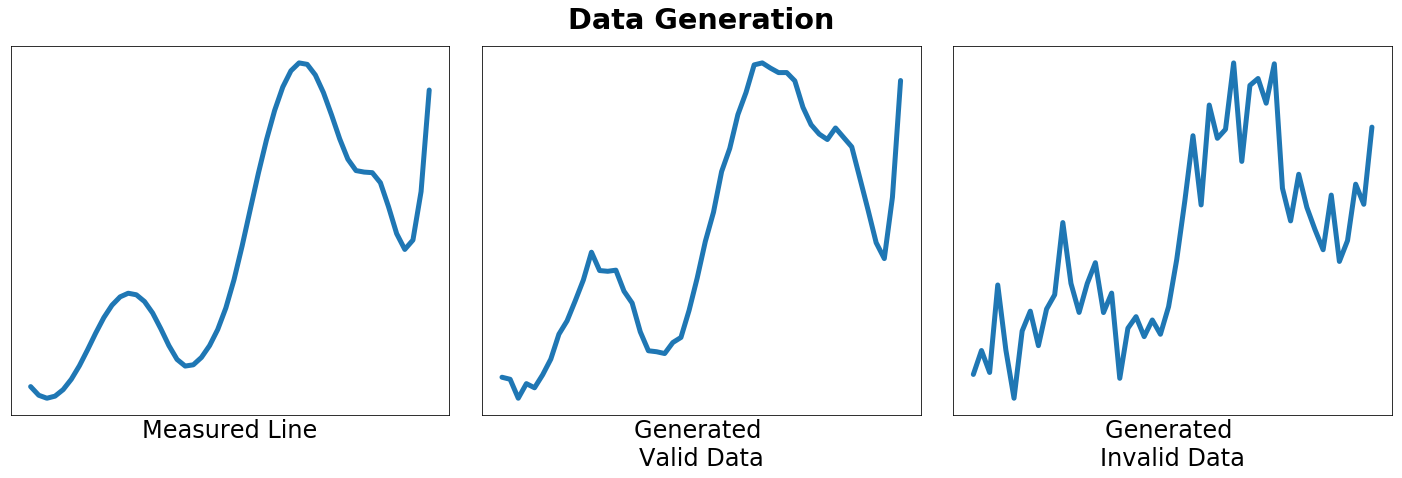

In [9]:
mp.rcParams.update({'font.size': 24})
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,20/3.0))
frequency_vals = array_dictionary_system["CTN210"]["System 2,7"].values()[0]["Frequency"]
ax1.plot(frequency_vals, array_dictionary_system["CTN210"]["System 2,7"].values()[0]["magS22"],lw=5,solid_capstyle="round")
ax1.set_xlabel("Measured Line")
ax1.set_xticks([])
ax1.set_yticks([])
ax2.plot(frequency_vals, good_fake_data_system.values()[0]["magS22"],lw=5,solid_capstyle="round")
ax2.set_xlabel("Generated \nValid Data")
ax2.set_xticks([])
ax2.set_yticks([])
ax3.plot(frequency_vals, bad_fake_data_system.values()[0]["magS22"],lw=5,solid_capstyle="round")
ax3.set_xlabel("Generated \nInvalid Data")
ax3.set_xticks([])
ax3.set_yticks([])
fig.suptitle("Data Generation", y=1.02, fontweight="bold")
plt.tight_layout()
plt.show()

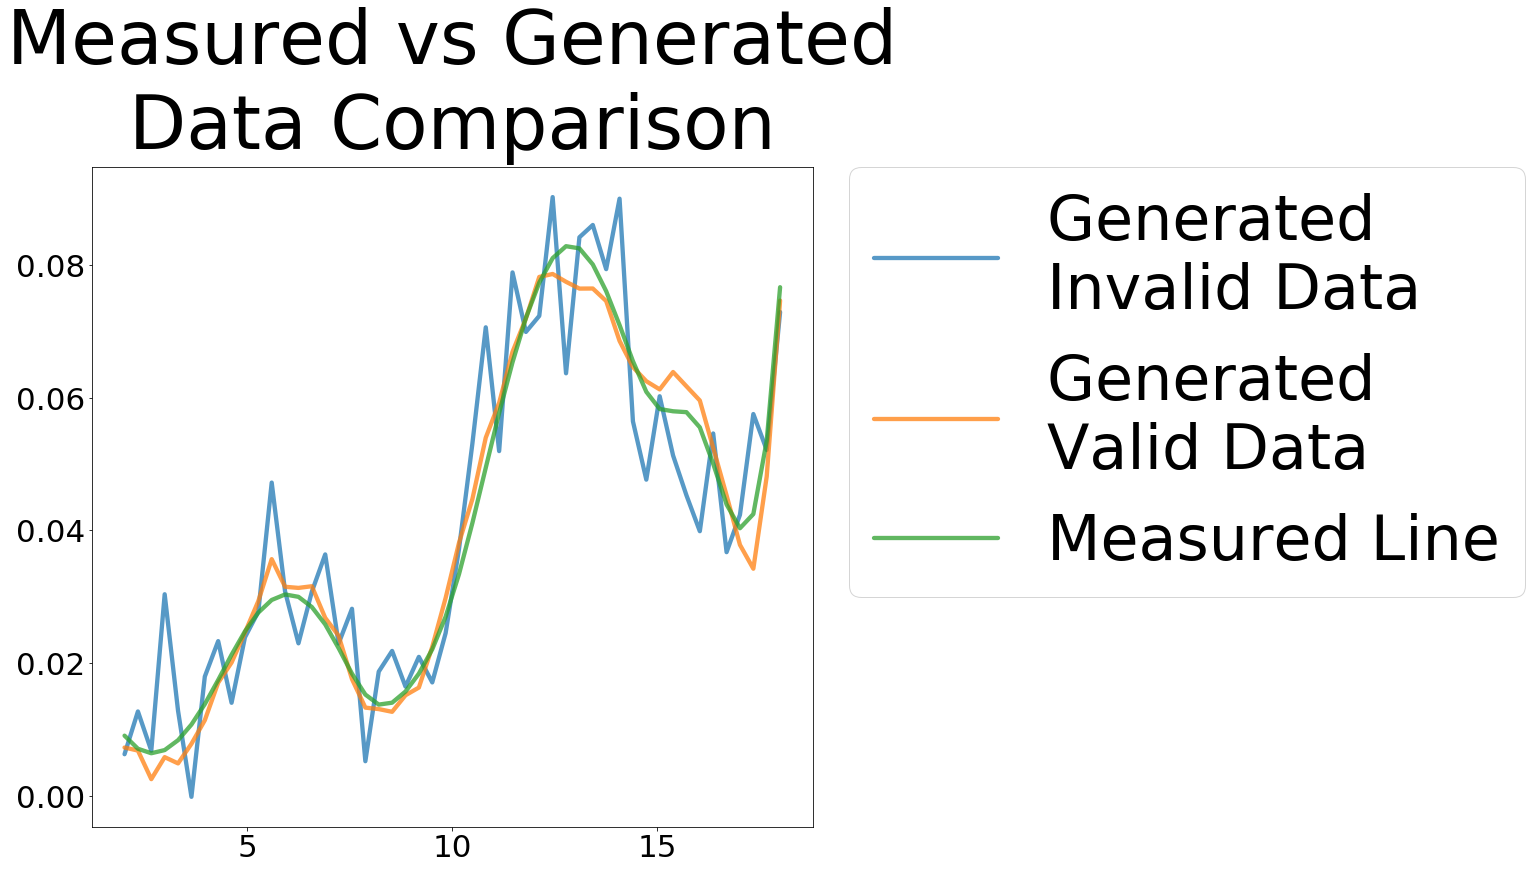

In [18]:
sizemultiplier = 13.7777778
mp.rcParams.update({'font.size': 4.5*sizemultiplier})
mp.rc('xtick', labelsize=(2.25 * sizemultiplier)) 
mp.rc('ytick', labelsize=(2.25 * sizemultiplier)) 
plt.figure(figsize=(sizemultiplier,sizemultiplier))
frequency_vals = array_dictionary_system["CTN210"]["System 2,7"].values()[0]["Frequency"]
line3=plt.plot(frequency_vals, bad_fake_data_system.values()[0]["magS22"],lw=(0.625*sizemultiplier/2),alpha=0.75,solid_capstyle="round",label="Generated \nInvalid Data")
line2=plt.plot(frequency_vals, good_fake_data_system.values()[0]["magS22"],lw=(0.625*sizemultiplier/2),alpha=0.75,solid_capstyle="round",label="Generated \nValid Data")
line1=plt.plot(frequency_vals, array_dictionary_system["CTN210"]["System 2,7"].values()[0]["magS22"],alpha=0.75,lw=(0.625*sizemultiplier/2),solid_capstyle="round",label="Measured Line")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Measured vs Generated\nData Comparison",y=1.02)
plt.tight_layout()
plt.show()